# Hierarchial and K-means Clustering
## 21BAI1533 Zeel Mehta

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
from sklearn import datasets
iris=pd.read_csv('/Users/zeelmehta/Desktop/FALL INTER 23/ML/Decision Trees/Iris.csv')

In [105]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [106]:
x=iris.iloc[:, [0, 1, 2, 3]].values
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [107]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [108]:
iris[0:10]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [109]:
iriso=pd.crosstab(index=iris["Species"],columns="count") 

In [110]:
iriso

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [111]:
irissetosa=iris.loc[iris["Species"]=="Iris-setosa"]
irissetosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
irisvirginica=iris.loc[iris["Species"]=="Iris-virginica"]
irisvirginica.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica


In [113]:
irisversi=iris.loc[iris["Species"]=="Iris-versicolor"]
irisversi.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


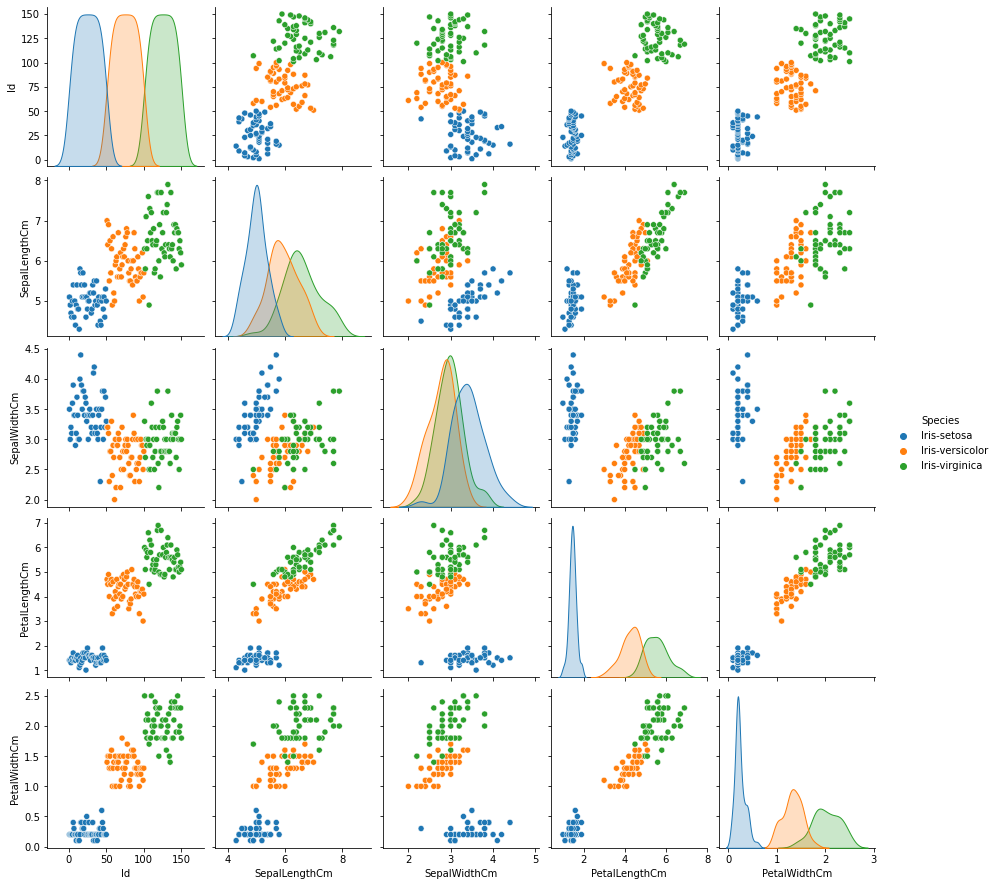

In [114]:
sns.pairplot(iris,hue="Species")

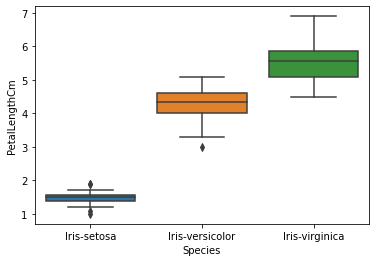

In [115]:
sns.boxplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

## K means

In [116]:
from sklearn.cluster import KMeans
wcss = []

In [117]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

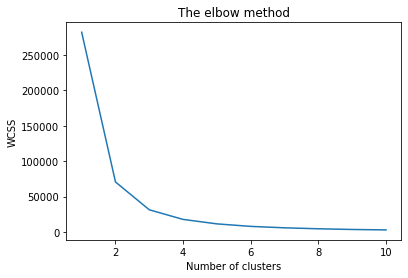

In [118]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [119]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

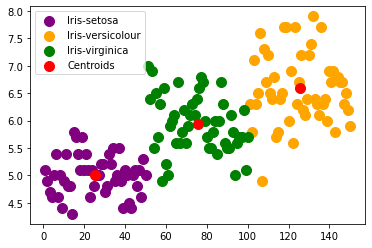

In [120]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

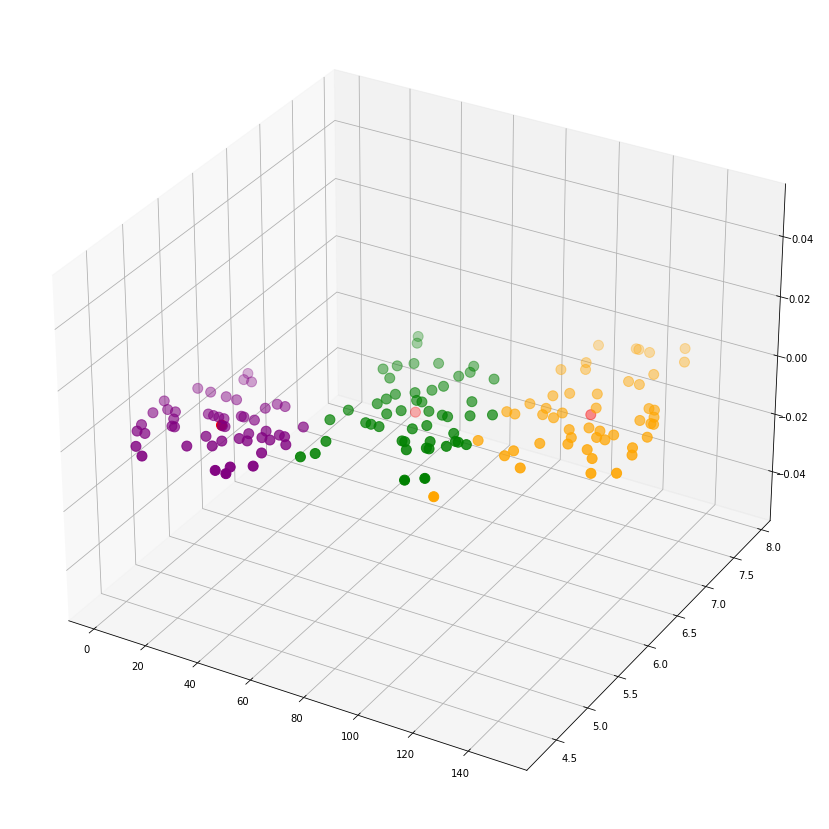

In [121]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

## HIERARCHIAL CLUSTERING

In [122]:
matcorr = iris.iloc[:,~iris.columns.isin(['Id','Species'])].corr()
mask = np.zeros_like(matcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

/var/folders/72/3kxng2yd5yn203b626zw3kpc0000gn/T/ipykernel_11074/3622765179.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matcorr, dtype=np.bool)


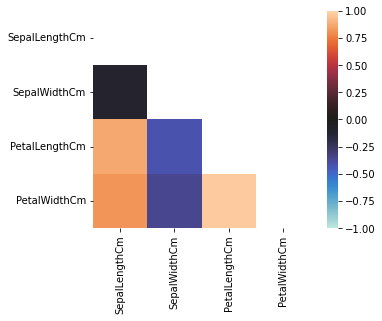

In [123]:
sns.heatmap(matcorr, mask=mask, vmin=-1, vmax=1, center=0, square=True);

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage

### single linkage

In [125]:
dist_sin = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="single")

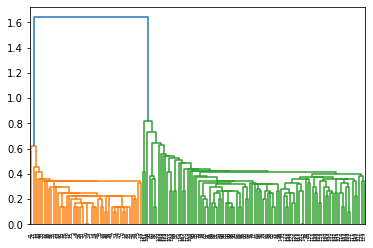

<Figure size 1296x432 with 0 Axes>

In [126]:
dendrogram(dist_sin, leaf_rotation=90)
plt.figure(figsize=(18,6))
plt.show()

In [127]:
from scipy.cluster.hierarchy import fcluster
iris_SM=iris.copy()

In [128]:
iris_SM['2_clust']=fcluster(dist_sin,2, criterion='maxclust')
iris_SM['3_clust']=fcluster(dist_sin,3, criterion='maxclust')
iris_SM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


<AxesSubplot:title={'center':'Species'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

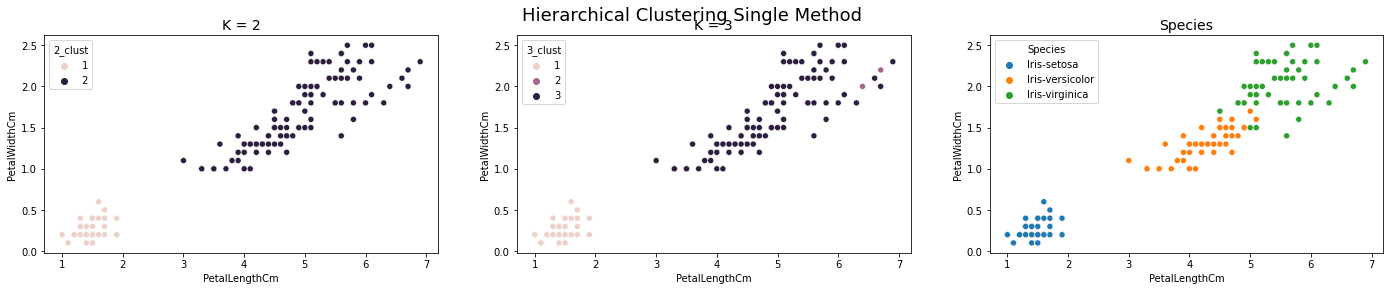

In [129]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", data=iris_SM, hue="Species")

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 34.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'K = 3'}, xlabel='Species', ylabel='3_clust'>

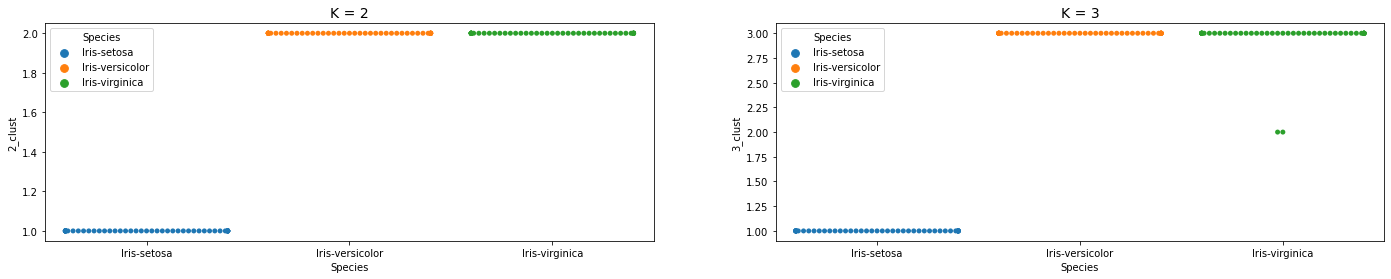

In [130]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_SM, hue="Species")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_SM, hue="Species")

<AxesSubplot:ylabel='2_clust'>

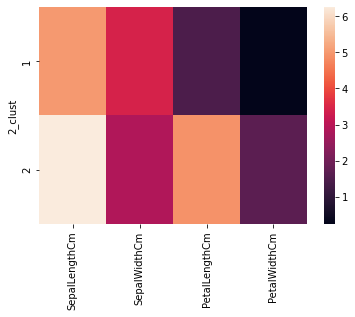

In [131]:
sns.heatmap(iris_SM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","2_clust"]].groupby(['2_clust']).mean())

### Complete linkage

In [132]:
dist_comp = linkage(iris.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]],method="complete")

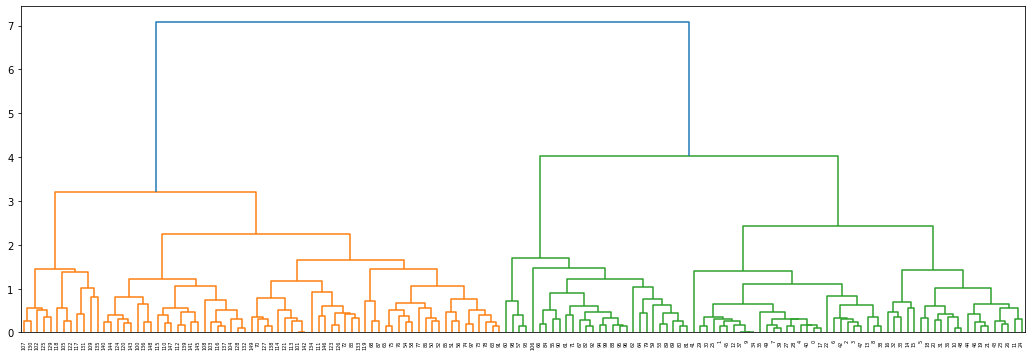

In [133]:
plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90)
plt.show()

In [134]:
iris_CM=iris.copy()
iris_CM['2_clust']=fcluster(dist_comp,2, criterion='maxclust')
iris_CM['3_clust']=fcluster(dist_comp,3, criterion='maxclust')
iris_CM.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,2_clust,3_clust
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2,3
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2,3
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2,3
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2,3
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2,3


<AxesSubplot:title={'center':'Species'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

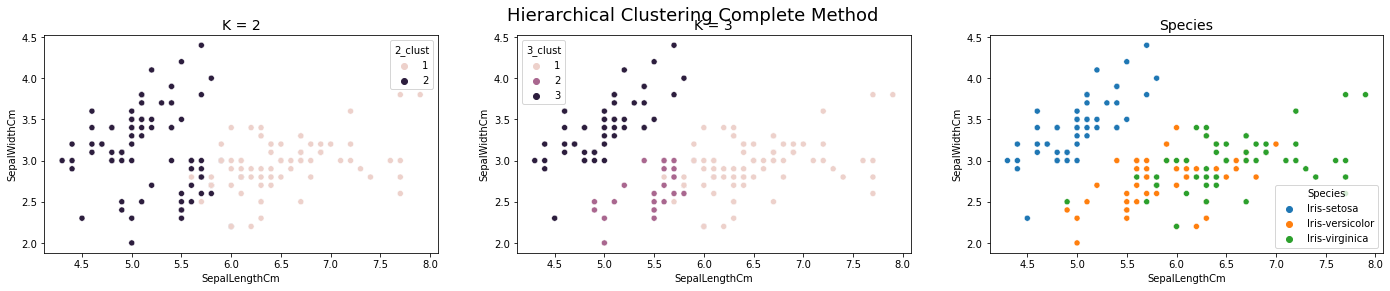

In [135]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Complete Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("Species",fontsize=14)
sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", data=iris_CM, hue="Species")

/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zeelmehta/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 36.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'K = 3'}, xlabel='Species', ylabel='3_clust'>

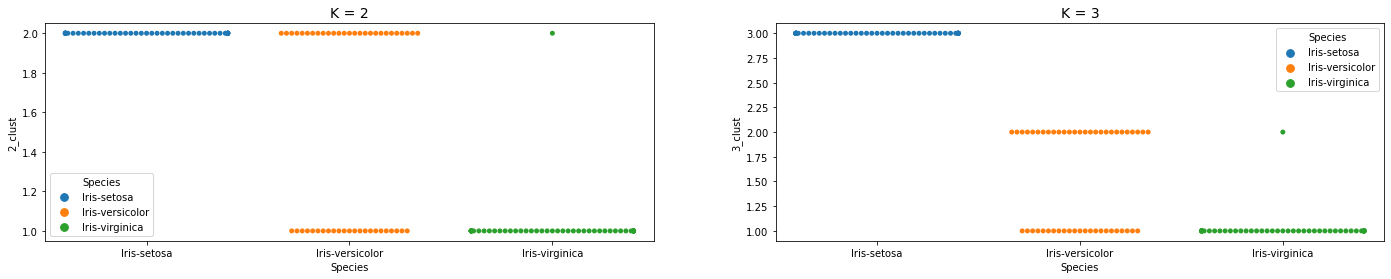

In [136]:
plt.figure(figsize=(24,4))
plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="Species",y="2_clust", data=iris_CM, hue="Species")

plt.subplot(1,2,2)
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="Species",y="3_clust", data=iris_CM, hue="Species")

<AxesSubplot:ylabel='3_clust'>

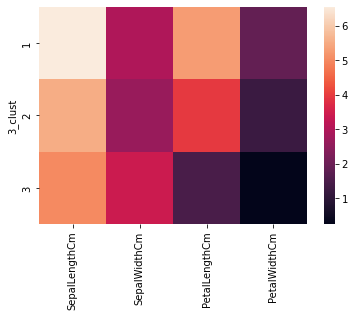

In [137]:
sns.heatmap(iris_CM.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","3_clust"]].groupby(['3_clust']).mean())